In [1]:
# Michigan Hackers Machine Learning Team
# Project: Simple Linear Regression of yoe:sal.csv
# Description: Find linear relationship between years of experience vs salary
# Author: Liying Chen
# Date: October 9th 2020

In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Import Dataset
dataset = pd.read_csv('yoe:sal.csv')
X = np.array(dataset['YearsExperience'])
Y = np.array(dataset['Salary'])

In [4]:
# Helper Functions
#maps X to a power+1 dimension such that x => [1 x x^2 x^3 ... x^power]
def poly_dim(X, power=1):
    Phi = np.array([[x ** p for p in range(power + 1)] for x in X])
    return Phi

#returns mean squared error between predicted and true y-values
def MSE(X, theta, Y):
    return np.sum((Y - np.dot(X, theta))**2) / len(X)

In [5]:
# Implement Gradient Descent
#GD(X values, Y vlaues, learning rate, epochs)
def GD(X, Y, L, epochs):
    theta = np.zeros(X.shape[1])
    n = len(X)
    for i in range(epochs):
        Y_pred = np.dot(X, theta)
        Y_delta = Y - Y_pred
        gradient = 2 * np.dot(Y_delta, X) / n
        theta += L*gradient
    return theta

In [6]:
# main function
Phi = poly_dim(X)
theta = GD(Phi, Y, 10**-4, 10**5)
#print(MSE(Phi, theta, Y))

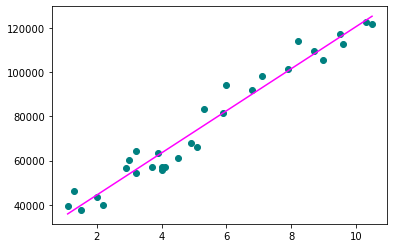

In [7]:
# Plot Data
plt.scatter(X, Y, color='teal')
plt.plot(X, np.dot(Phi, theta), color='magenta')
#m_np, b_np = np.polyfit(X, Y, 1)
#plt.plot(X, m_np*X+b_np, color='blue')
plt.show()